# Feature Extraction - Comparison - Bearing 1

### In this Notebook, we concentrate only on Bearing1. We will compare the anomaly detection (outlier detection) output for different features. Here three feature extraction techniques are used: Mean, RMS (Root Mean Square) & Kurtosis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

## Load and combine the Dataset
### Calculate Mean & RMS

In [2]:
# Create the blank dataframe
combined_data = pd.DataFrame()

# Set the file directory
data_dir = 'D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test'

# Iterate through all the files
for file_name in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, file_name), sep='\t')
    # To get numpy values
    df_b1 = df.iloc[:,0].values
    # To calculate the mean
    df_mean = np.mean(np.absolute(df_b1))
    # To calculate rms
    df_rms = np.sqrt((np.sum(df_b1**2))/len(df_b1))
    # To calculate kurtosis
    df_kurt = scipy.stats.kurtosis(df_b1,fisher=False)
    # Concate into Pandas DataFrame
    df_1 = pd.concat([pd.Series(df_mean),pd.Series(df_rms),pd.Series(df_kurt)],axis=1)
    
    # Set the index as date_time, which is the name of the file
    df_1.index = [file_name]
    
    # Append individual dataframes to create a single combined dataset
    combined_data = combined_data.append(df_1)
    
# Insert Column headers    
combined_data.columns = ['Bearing_Mean','Bearing_RMS','Bearing_Kurt']
  

### Sort the dataset with data_time as index

In [3]:
# Set the data_time index and ensuring the proper format
combined_data.index = pd.to_datetime(combined_data.index, format='%Y.%m.%d.%H.%M.%S')

# Sort the index in chronological order
combined_data = combined_data.sort_index()


# Printing the combined_data
print(combined_data.head(5))
print(combined_data.shape)

                     Bearing_Mean  Bearing_RMS  Bearing_Kurt
2004-02-12 10:32:39      0.058333     0.074180      3.628672
2004-02-12 10:42:39      0.058995     0.075382      3.648479
2004-02-12 10:52:39      0.060236     0.076228      3.513839
2004-02-12 11:02:39      0.061455     0.078726      4.157776
2004-02-12 11:12:39      0.061361     0.078475      3.603207
(984, 3)


## Visualizing the data

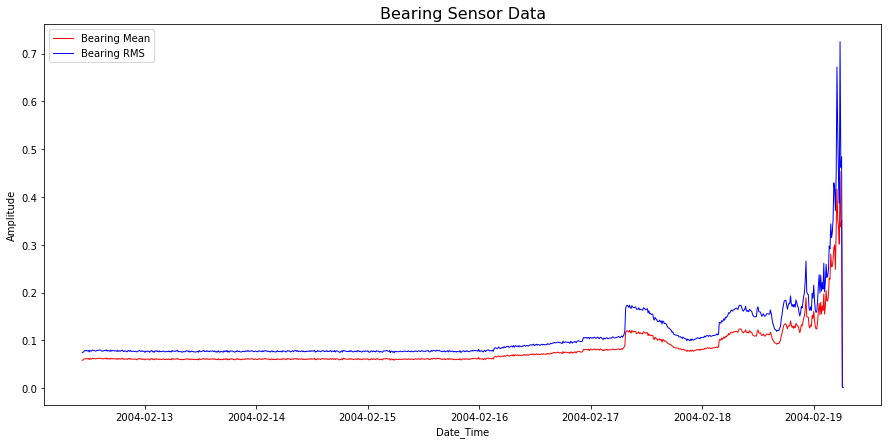

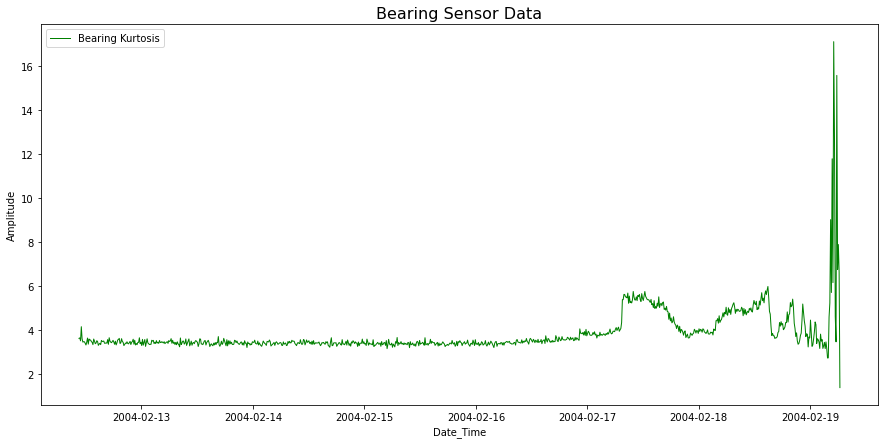

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing_Mean'], label='Bearing Mean', color='red',linewidth=1)
ax.plot(combined_data['Bearing_RMS'], label='Bearing RMS', color='blue', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing_Kurt'], label='Bearing Kurtosis', color='green', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### Drop last 2 rows. As the bearings failed, the machine is stopped and the vibrations becomes zero. (Near 0)

In [5]:
print(combined_data.tail(5))
combined_data = combined_data[:-2]
combined_data.shape

                     Bearing_Mean  Bearing_RMS  Bearing_Kurt
2004-02-19 05:42:39      0.453335     0.725019     15.576977
2004-02-19 05:52:39      0.337583     0.462021      6.759714
2004-02-19 06:02:39      0.351111     0.483847      7.891370
2004-02-19 06:12:39      0.001857     0.002103      6.637219
2004-02-19 06:22:39      0.001168     0.001533      1.390177


(982, 3)

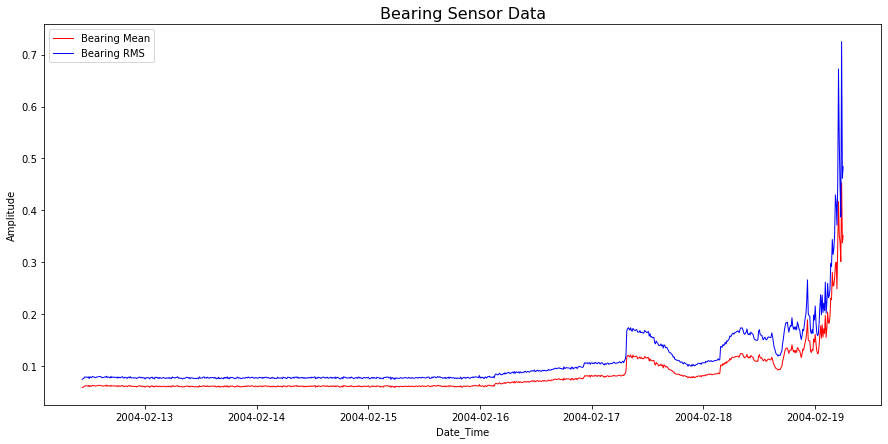

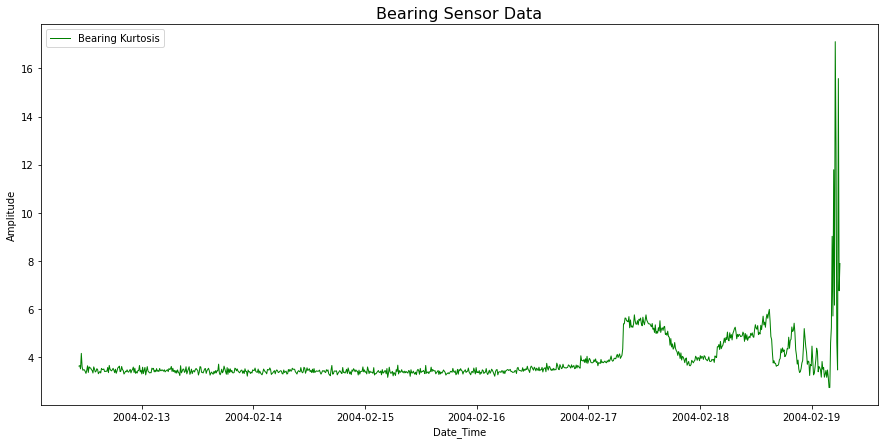

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing_Mean'], label='Bearing Mean', color='red',linewidth=1)
ax.plot(combined_data['Bearing_RMS'], label='Bearing RMS', color='blue', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing_Kurt'], label='Bearing Kurtosis', color='green', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

## Univariate Anomaly Detection - Bearing 1

## Statistical Process Control Method (mean + 3sigma thresholding)

In [7]:
# Calculate Threshold for Bearing 1 - Mean Value
# Based on dataset description, Bearing 1 is failed at the end of this dataset. 
# Hence, We are considering only the feature "Bearing 1" to calculate the threshold
# As this a run to failure test first new hundred samples are considered as normal values
bearing1_200_samples = combined_data['Bearing_Mean'][0:450]
mean_bearing1 = bearing1_200_samples.mean()
three_sigma_bearing1 = 3 * bearing1_200_samples.std()
threshold_bearing1 = mean_bearing1 + three_sigma_bearing1
print('Threshold Bearing: ', threshold_bearing1)

Threshold Bearing:  0.06319053891187996


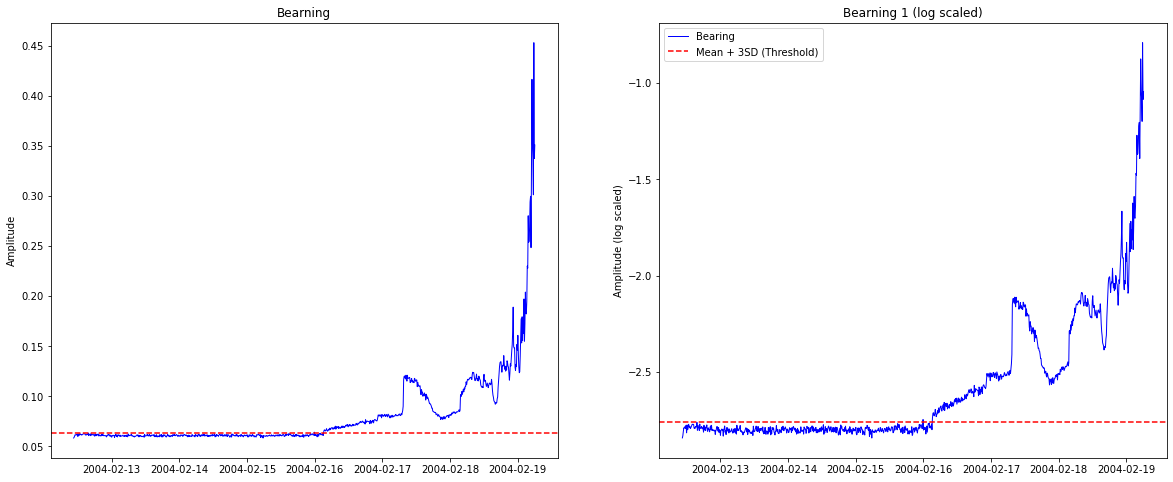

In [8]:
# Visualizing - Univariate Anomaly Detection - Bearing 1
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
ax[0].plot(combined_data['Bearing_Mean'], label='Bearing', color='blue',linewidth=1)
ax[0].axhline(threshold_bearing1, color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Bearning')
ax[1].plot(np.log(combined_data['Bearing_Mean']), label='Bearing', color='blue',linewidth=1)
ax[1].axhline(np.log(threshold_bearing1), color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[1].set_ylabel('Amplitude (log scaled)')
ax[1].set_title('Bearning 1 (log scaled)')
plt.legend()

## Convert index into Samples (time steps) for easier interpretation

In [9]:
new_comb_data = combined_data.copy()
new_comb_data['time_steps'] = np.arange(0,len(combined_data))
new_comb_data.index = new_comb_data['time_steps']
new_comb_data.drop(['time_steps'],axis=1,inplace=True)

## Split the dataset into Training and Test set.
* Only Normal data is used in the training process. Because we don't have access to the anomaly data at an early stage.
* Once the anomaly detection (outlier detection) algorithm learns the normal data (training set), it can determine whether a test instance belongs to the normal class or if it is an anomaly.
* First 300 samples (approx. 3 days of data) are used as training set

In [10]:
training = new_comb_data.iloc[:450,:]
test = new_comb_data.iloc[450:,:]
test.reset_index(inplace=True)

## Function to Visualize the data

In [11]:
def viz_result(data,pred,title):
    fig, ax = plt.subplots(nrows=2,figsize=(15,8))
    ax[0].plot(data, label='Bearing Signal', color='red',linewidth=1)
    ax[1].scatter(range(0,len(pred)),pred, label='Anomaly (-1)')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    viz_df=pd.DataFrame({'Bearing':data,'No_Anomaly':pred})
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing,hue=viz_df.No_Anomaly,palette="deep")
    plt.plot(data, color='black',linewidth=1,alpha=0.5)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

### Based on the visual analyis of dataset, kurtosis feature cannot be used to detect outlier. There are lot of fluctuations in the kurtosis feature. Hence, the features mean and RMS are used for outlier detection.

# Isolation Forest

## Mean Based

In [12]:
# Training the model with normal data
from sklearn.ensemble import IsolationForest
bearing_mean_ifm = IsolationForest(max_samples=100, random_state=0,contamination=0.005)
bearing_mean_ifm.fit(training['Bearing_Mean'].values.reshape(-1,1))

IsolationForest(contamination=0.005, max_samples=100, random_state=0)

Testing on Entire dataset
Anomaly	-1	454
Normal 	1	528


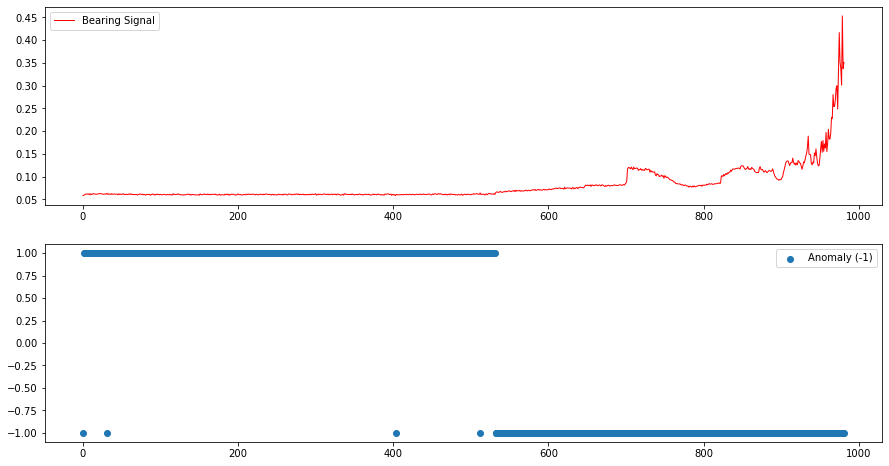

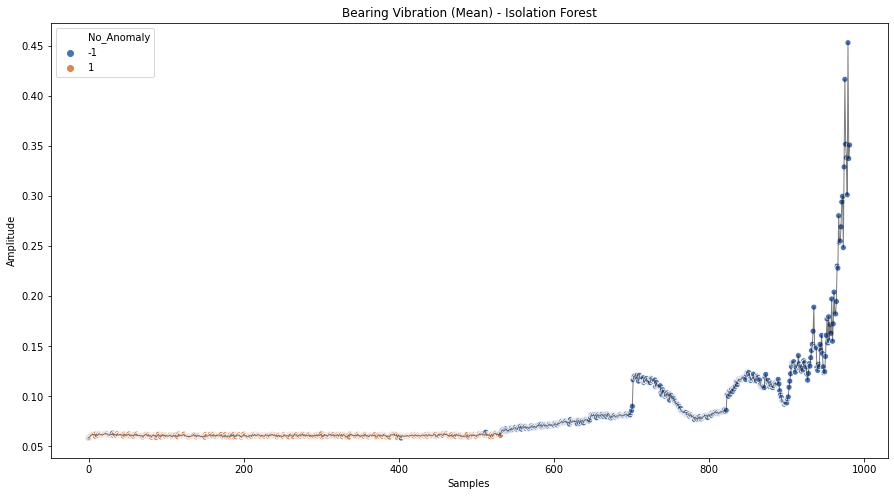

In [13]:
# Testing on Entire dataset
pred_ifm_mean = bearing_mean_ifm.predict(new_comb_data['Bearing_Mean'].values.reshape(-1,1))
unique_elements, counts_elements = np.unique(pred_ifm_mean, return_counts=True)
print("Testing on Entire dataset")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
viz_result(new_comb_data['Bearing_Mean'],pred_ifm_mean,'Bearing Vibration (Mean) - Isolation Forest')

## RMS Based

In [14]:
# Training the model with normal data
bearing_rms_ifm = IsolationForest(max_samples=100, random_state=0,contamination=0.007)
bearing_rms_ifm.fit(training['Bearing_RMS'].values.reshape(-1,1))

IsolationForest(contamination=0.007, max_samples=100, random_state=0)

Testing on Entire dataset
Anomaly	-1	455
Normal 	1	527


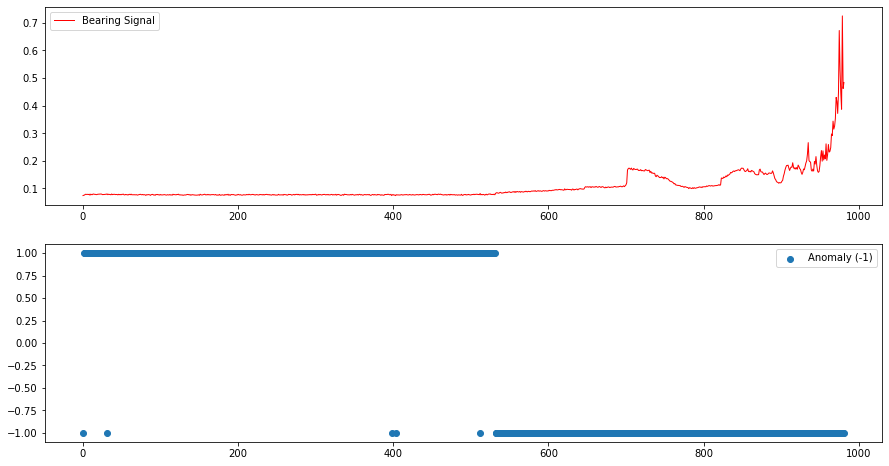

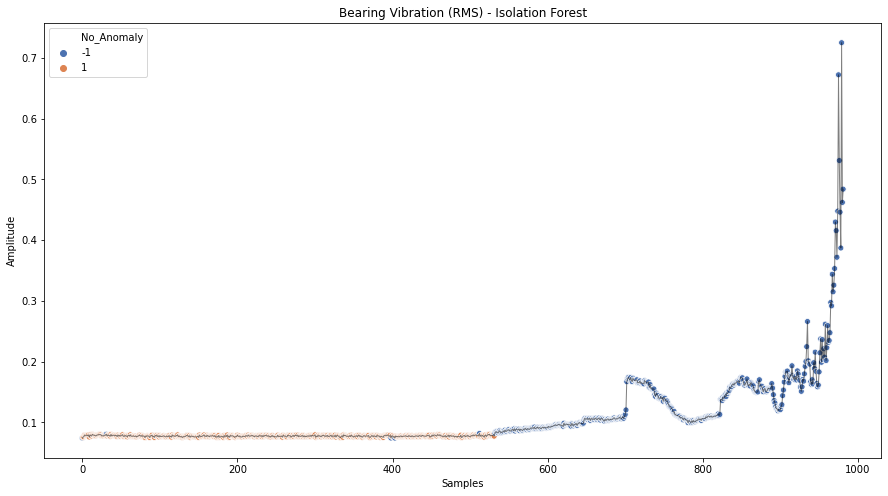

In [15]:
# Testing on Entire dataset
pred_ifm_rms = bearing_rms_ifm.predict(new_comb_data['Bearing_RMS'].values.reshape(-1,1))
unique_elements, counts_elements = np.unique(pred_ifm_rms, return_counts=True)
print("Testing on Entire dataset")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
viz_result(new_comb_data['Bearing_RMS'],pred_ifm_rms,'Bearing Vibration (RMS) - Isolation Forest')

# Local Outlier Factor

## Mean based

In [16]:
# Training using Normal data
from sklearn.neighbors import LocalOutlierFactor
lof_mean = LocalOutlierFactor(n_neighbors=20, contamination=0.004,novelty=True)
lof_mean.fit(training['Bearing_Mean'].values.reshape(-1,1))

LocalOutlierFactor(contamination=0.004, novelty=True)

Testing on Entire dataset
Anomaly	-1	453
Normal 	1	529


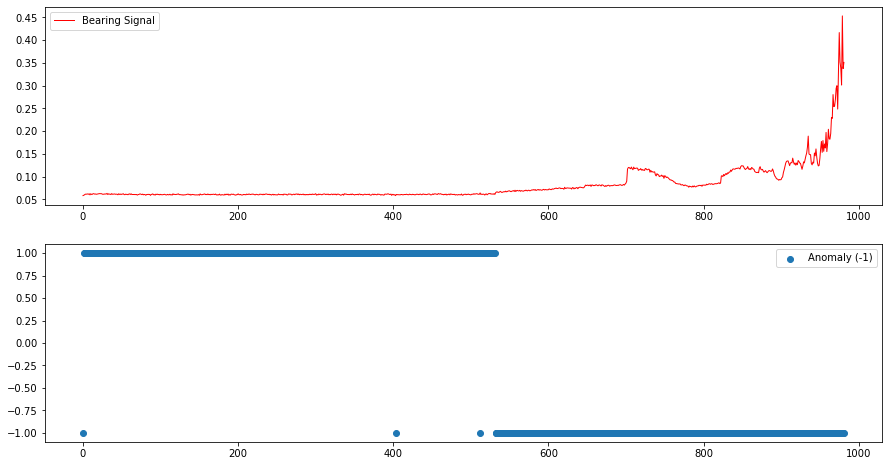

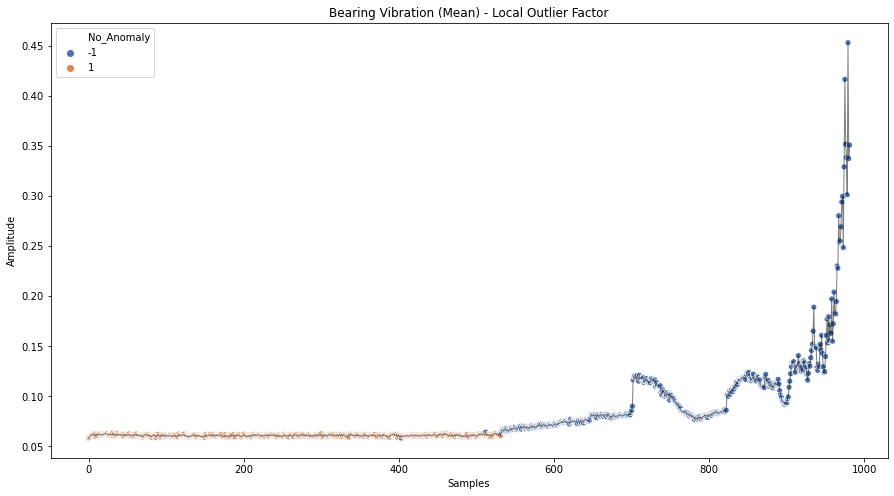

In [17]:
# Testing on Entire dataset
pred_lof_mean = lof_mean.predict(new_comb_data['Bearing_Mean'].values.reshape(-1,1))
unique_elements, counts_elements = np.unique(pred_lof_mean, return_counts=True)
print("Testing on Entire dataset")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
viz_result(new_comb_data['Bearing_Mean'],pred_lof_mean,'Bearing Vibration (Mean) - Local Outlier Factor')

## RMS Based

In [18]:
# Training using Normal data
from sklearn.neighbors import LocalOutlierFactor
lof_rms = LocalOutlierFactor(n_neighbors=20, contamination=0.002,novelty=True)
lof_rms.fit(training['Bearing_RMS'].values.reshape(-1,1))

LocalOutlierFactor(contamination=0.002, novelty=True)

Testing on Entire dataset
Anomaly	-1	451
Normal 	1	531


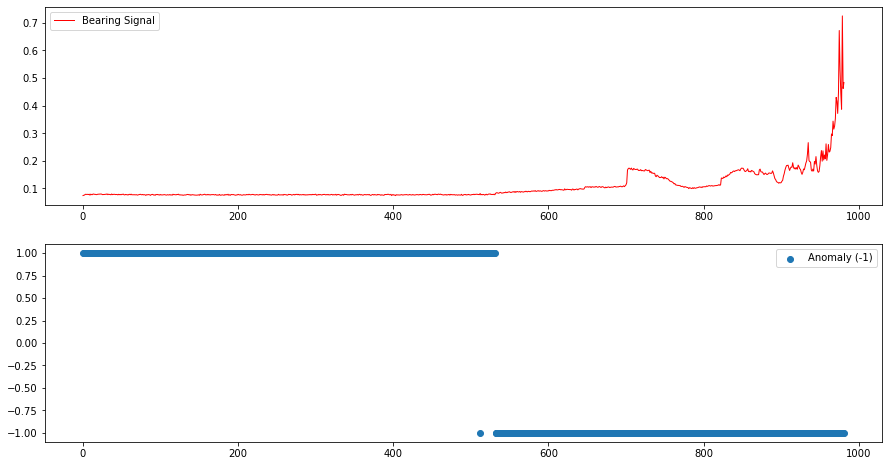

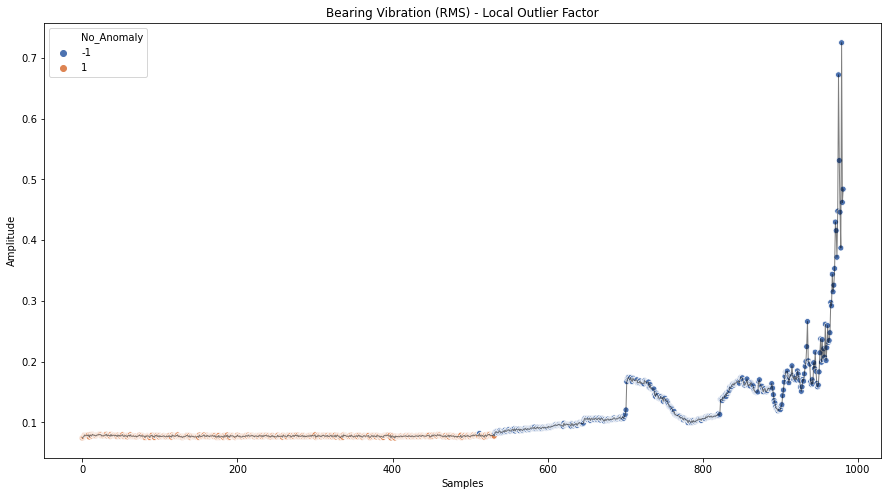

In [19]:
# Testing on Entire dataset
pred_lof_rms = lof_rms.predict(new_comb_data['Bearing_RMS'].values.reshape(-1,1))
unique_elements, counts_elements = np.unique(pred_lof_rms, return_counts=True)
print("Testing on Entire dataset")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
viz_result(new_comb_data['Bearing_RMS'],pred_lof_rms,'Bearing Vibration (RMS) - Local Outlier Factor')

## Evaluation Metrics

### As we are using the Unsupervised Anomaly Detection technique (outlier detection), there is no direct metrics to evaluate the performance. To evaluate the performance, I have labelled the data as anomaly or not, based on heuristics and Mean + 3 sigma thresholding (Statistical Process Control).

In [20]:
## anodet - Anomaly Detection Function 
def anodet(x):
    '''
    Labels the data as anomaly or not based on
    Mean + 3 sigma thresholding (Statistical Process Control)
    '''
    if x < threshold_bearing1:
        return 1
    else:
        return -1
# Applying anodet function 
new_comb_data['No_Anomaly_Actual'] = new_comb_data['Bearing_Mean'].apply(anodet)
new_comb_data.at[31,"No_Anomaly_Actual"] = 1

 1    531
-1    451
Name: No_Anomaly_Actual, dtype: int64


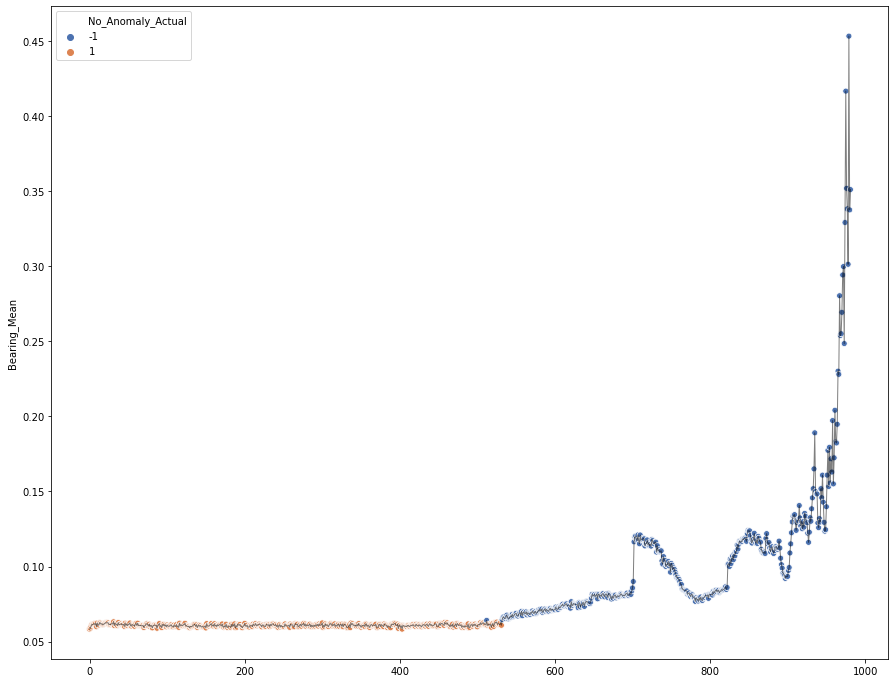

In [21]:
## Visualization of True Labels 
print(new_comb_data.No_Anomaly_Actual.value_counts())
plt.figure(figsize=(15,12))
plt.plot(new_comb_data.Bearing_Mean, color='black',linewidth=1,alpha=0.5)
sns.scatterplot(x=range(0,len(new_comb_data)),y=new_comb_data.Bearing_Mean,hue=new_comb_data.No_Anomaly_Actual,palette="deep")

### 1  Normal (No Anomaly)
### -1  Abnormal (Anomaly)

##  Confusion Matrix & Accuracy Score

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
# Isolation Forest - Mean
cm_ifm_mean = confusion_matrix(new_comb_data['No_Anomaly_Actual'], pred_ifm_mean)
acc_ifm_mean = accuracy_score(new_comb_data['No_Anomaly_Actual'], pred_ifm_mean)

# Isolation Forest - RMS
cm_ifm_rms = confusion_matrix(new_comb_data['No_Anomaly_Actual'], pred_ifm_rms)
acc_ifm_rms = accuracy_score(new_comb_data['No_Anomaly_Actual'], pred_ifm_rms)

# LOF (Local Outlier Factor) - Mean
cm_lof_mean = confusion_matrix(new_comb_data['No_Anomaly_Actual'], pred_lof_mean)
acc_lof_mean = accuracy_score(new_comb_data['No_Anomaly_Actual'], pred_lof_mean)

# LOF - RMS
cm_lof_rms = confusion_matrix(new_comb_data['No_Anomaly_Actual'], pred_lof_rms)
acc_lof_rms = accuracy_score(new_comb_data['No_Anomaly_Actual'], pred_lof_rms)

In [24]:
#tn, fp, fn, tp
TN = [cm_ifm_mean[0][0],cm_ifm_rms[0][0],cm_lof_mean[0][0],cm_lof_rms[0][0]]
FP = [cm_ifm_mean[0][1],cm_ifm_rms[0][1],cm_lof_mean[0][1],cm_lof_rms[0][1]]
FN = [cm_ifm_mean[1][0],cm_ifm_rms[1][0],cm_lof_mean[1][0],cm_lof_rms[1][0]]
TP = [cm_ifm_mean[1][1],cm_ifm_rms[1][1],cm_lof_mean[1][1],cm_lof_rms[1][1]]
acc = [acc_ifm_mean,acc_ifm_rms,acc_lof_mean,acc_lof_rms]

## Store the metrics in Pandas Dataframe

In [25]:
results_dict = {'True Negative':TN,'False Positive':FP,'False Negative':FN,'True Positive':TP,'Accuracy':acc}
results_df = pd.DataFrame(results_dict)
results_df.index = ['Isolation_Forest_Mean','Isolation_Forest_RMS','LOF_Mean','LOF_RMS']

In [26]:
results_df.head()

,True Negative,False Positive,False Negative,True Positive,Accuracy
Isolation_Forest_Mean,451,0,3,528,0.996945
Isolation_Forest_RMS,451,0,4,527,0.995927
LOF_Mean,451,0,2,529,0.997963
LOF_RMS,451,0,0,531,1.000000


## Inference
### **-1 (Anomaly - Negative)**
### **1  (Normal  - Positive)**
* The metrics True Negative and False Positive indicates the detection of outlier (anomaly). All these algorithms detects the anomalies correctly.
* False Negatives indicates false alarms i.e. The actual value is normal (1), but the predicted value is Abnormal (-1)
* Local Outlier Factor based methods reduces the false alarms (False Negatives)
* Local Outlier Factor on RMS Value performs well when compared with other algorithms